In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
dataset = pd.read_csv(path, names = headernames)
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

In [17]:
y_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:", result1)


confusion Matrix:
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
Accuracy: 0.9666666666666667


In [23]:
result2=classification_report(y_test,y_pred,digits=2)
print(result2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [24]:
cnt =0
count=[]
train_score =[]
test_score = []
# Will take some time
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    

    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ",np.mean(train_score))
print("Average test score is :  ", np.mean(test_score))

for k =  1
train_score is :   1.0 and test score is :   0.9666666666666667
for k =  2
train_score is :   0.9583333333333334 and test score is :   0.9666666666666667
for k =  3
train_score is :   0.9666666666666667 and test score is :   0.9666666666666667
for k =  4
train_score is :   0.9666666666666667 and test score is :   0.9666666666666667
for k =  5
train_score is :   0.9833333333333333 and test score is :   0.9666666666666667
for k =  6
train_score is :   0.975 and test score is :   0.9666666666666667
for k =  7
train_score is :   0.975 and test score is :   0.9666666666666667
for k =  8
train_score is :   0.9833333333333333 and test score is :   0.9333333333333333
for k =  9
train_score is :   0.9666666666666667 and test score is :   0.9333333333333333
for k =  10
train_score is :   0.975 and test score is :   0.9333333333333333
for k =  11
train_score is :   0.9833333333333333 and test score is :   0.9666666666666667
for k =  12
train_score is :   0.9916666666666667 and test sco

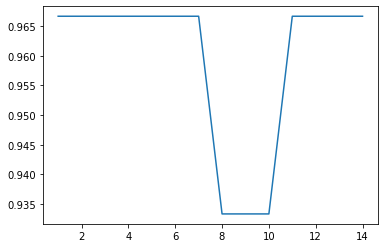

In [25]:
plt.plot(count,test_score)

Text(0, 0.5, 'Accuracy Rate')

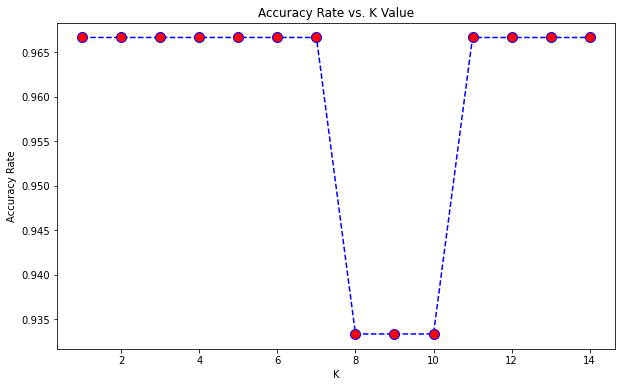

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),test_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

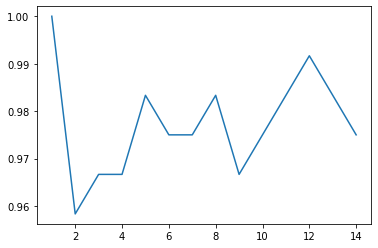

In [26]:
plt.plot(count,train_score)

In [28]:
test_score

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [29]:
count

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Hypertuning

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : [3,5,7,9,10,11,12,13,15,17]}

In [31]:
gridsearch = GridSearchCV(knn, param_grid,cv=10)

In [32]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13, 15, 17]})

In [33]:
gridsearch.best_params_

{'n_neighbors': 11}

In [37]:
gridsearch.best_score_

0.9666666666666666